In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('aps_failure_training_set1.csv', na_values="na")

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [5]:
df.shape

(36188, 171)

In [6]:
df['class'].value_counts()

## Imbalanced Data

class
neg    35188
pos     1000
Name: count, dtype: int64

In [7]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print Columns
print('We have {} numerical feature: {}'.format(len(numeric_features),
                                               numeric_features))
print('\nWe have {} categorical feature: {}'.format(len(categorical_features), categorical_features))

We have 170 numerical feature: ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 

#### As this is a Sensor Data. Interpretation of the data is not required

## Checking missing values

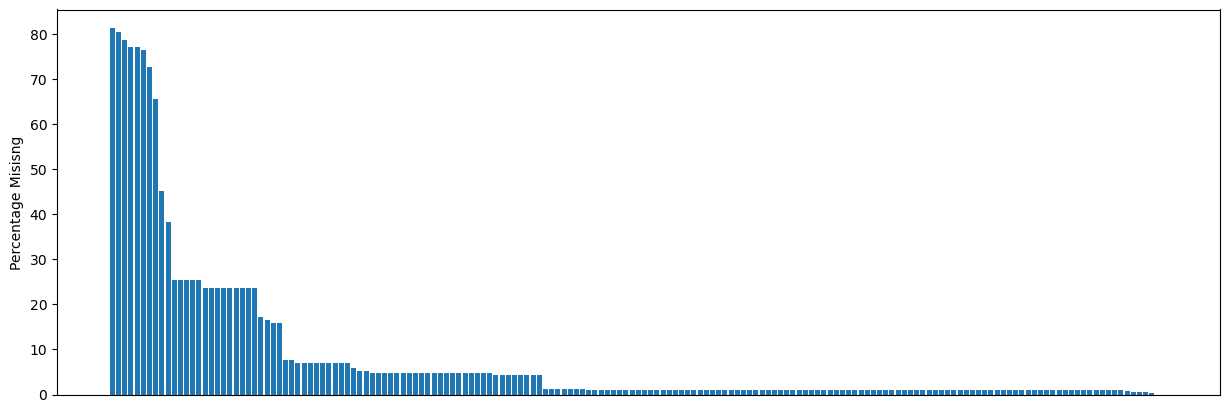

In [8]:
# Plotting Missing Values count for each column

fig, ax = plt.subplots(figsize = (15, 5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage Misisng")
plt.show()

### Dropping columns which has more than 70% of missing values.

In [9]:
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [10]:
df.drop(list(dropcols.index), axis = 1, inplace = True)

In [11]:
df.shape

(36188, 164)

In [12]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 5.37059852747306%


#### Visualization of unique values in Target variable

Positive: 1000, Negative: 35188


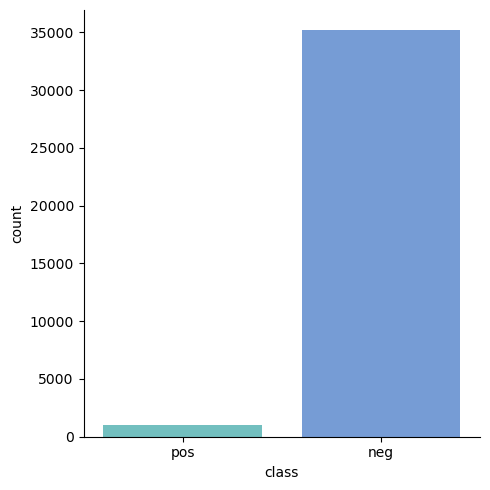

In [13]:
pos = df[df['class'] == 'pos'].shape[0]
neg = df[df['class'] == 'neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data = df, x = "class", kind = "count", palette = "winter_r", alpha =.6)
plt.show()

### Target classes are highly imbalanced

### Create functions for model training and evaluation

In [14]:
def evaluate_clf(true, predicted):
    """
    This functions takes in true values and predicted values 
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    """
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted) # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) # Calculate roc_auc

In [15]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    """
    This function takes y_true, y_predicted, and prints Total cost due to misclassification
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10 * fp + 500 * fn
    return cost

In [16]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    """
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test Split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    """
    
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    cost_list = []
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train Model
        
        # Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision,\
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)
        
        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision,\
        model_test_recall, model_train_rocauc_score = evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        
        print("Model Performance for Training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 score: {:.4f}".format(model_train_f1))
        print("- Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}".format(model_train_recall))
        print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))
        print(f"- COST: {train_cost}")
              
        print("----------------------------------------")
              
        print("Model Performance for Test set")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        print("- F1 score: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}".format(model_test_recall))
        print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
        print(f"- COST: {test_cost}")
        print('='*35)
        print('\n')
              
    report = pd.DataFrame(list(zip(models_list, cost_list)), columns = ['Model Name', "Cost"]).sort_values(by = ["Cost"])
            
    return report

### Plot distribution of all Independant Numerical Variables

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x = df[col], color = 'indianred')
    plt.xlabel(col, weight = 'bold')
    plt.tight_layout()

#### Report
#### As per the above plot most of the features are not normally distributed.

In [ ]:
# Splitting X and y for all Experiments
X = df.drop('class', axis = 1)
y = df['class']

#### Manually encoding Target Variable

In [ ]:
y = y.replace({'pos': 1, 'neg': 0})

### KNN Imputer

In [ ]:
# Fit with robust scaler for KNN best K-selection experiment
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [ ]:
results = []
# Define imputer
imputer = KNNImputer(n_neighbors=5, weights = 'uniform', metric = 'nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps = [('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring = 'accuracy', cv = 2, n_jobs=1)
    results.append(scores)
    print('n_neighbors = %s || accuracy (%.4f)' % (s, mean(scores)))

##### We can observe that n_neighbors = 3 able to produce highest accuracy

#### Pipeline for KNN Imputer

In [ ]:
num_features = X.select_dtypes(exclude = "object").columns

# Fit the KNN Imputer with selected K-value
knn_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [ ]:
X_knn = knn_pipeline.fit_transform(X)

In [ ]:
from imblearn.combine import SMOTETomek